In [ ]:
https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification?select=labels.csv

SyntaxError: invalid syntax (<ipython-input-34-576597164236>, line 1)

In [ ]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications import ResNet50
from keras.layers import BatchNormalization, Dense, Dropout
from keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg


In [ ]:
import pandas as pd
from tensorflow.keras.applications import VGG16
vgg16_obj = VGG16(include_top = False, input_shape = (224,224,3))    #  include_top = False is used to skip the layer from flattern
for layer in vgg16_obj.layers:             # Off the training of the trainable parameters
    layer.trainable = False
vgg16_obj.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
vgg16_obj.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten
f1 = Flatten()(vgg16_obj.output)
final_layer = Dense(58, activation='softmax')(f1)
final_layer

<KerasTensor: shape=(None, 58) dtype=float32 (created by layer 'dense')>

In [ ]:
model = Model(inputs=vgg16_obj.input,outputs=final_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
traffic_datagen = ImageDataGenerator(rescale=1/255,
                                  shear_range=0.7,
                                  zoom_range=0.5)

In [ ]:
!unzip '/content/archive (10).zip' -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/traffic_Data/DATA/24/024_1_0040.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0041.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0042.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0043.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0044.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0045.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0046.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0047.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0048.png  
  inflating: /content/traffic_Data/DATA/24/024_1_0049.png  
  inflating: /content/traffic_Data/DATA/25/025_0001.png  
  inflating: /content/traffic_Data/DATA/25/025_1_0001.png  
  inflating: /content/traffic_Data/DATA/26/026_0001.png  
  inflating: /content/traffic_Data/DATA/26/026_0002.png  
  inflating: /content/traffic_Data/DATA/26/026_0003.png  
  inflating: /content/traffic_Data/DATA/26/026_0004.png  

In [ ]:
path='/content/traffic_Data/DATA'
traffic_data =traffic_datagen.flow_from_directory(
    directory=path,
    target_size=(224,224),
    batch_size=3,
    class_mode="categorical",
    )

Found 4170 images belonging to 58 classes.


In [ ]:
traffic_data.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57}

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(traffic_data, epochs=10)

Epoch 1/10


<ipython-input-11-6b3bda13400a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(traffic_data, epochs=10)


1390/1390 [==============================] - 2221s 2s/step - loss: 1.4637 - accuracy: 0.7271
Epoch 2/10
1390/1390 [==============================] - 2213s 2s/step - loss: 0.4060 - accuracy: 0.9089
Epoch 3/10
1390/1390 [==============================] - 2219s 2s/step - loss: 0.2879 - accuracy: 0.9405
Epoch 4/10
1390/1390 [==============================] - 2210s 2s/step - loss: 0.1887 - accuracy: 0.9602
Epoch 5/10
1390/1390 [==============================] - 2219s 2s/step - loss: 0.1497 - accuracy: 0.9650
Epoch 6/10
1390/1390 [==============================] - 2202s 2s/step - loss: 0.1188 - accuracy: 0.9727
Epoch 7/10
1390/1390 [==============================] - 2209s 2s/step - loss: 0.0818 - accuracy: 0.9796
Epoch 8/10
1390/1390 [==============================] - 2208s 2s/step - loss: 0.0801 - accuracy: 0.9799
Epoch 9/10
1390/1390 [==============================] - 2211s 2s/step - loss: 0.0790 - accuracy: 0.9830
Epoch 10/10
1390/1390 [==============================] - 2221s 2s/step - lo

In [ ]:
label = {0:"Speed Limit 5", 1:"Speed Limit 15", 2:"Speed Limit 30",
         3:"Speed Limit 40", 4:"Speed Limit 50", 5:"Speed Limit 60",
         6:"Speed Limit 70", 7:"Speed Limit 80", 8:"Don't go straight or left",
         9:"Don't go straight or right", 10:"Don't go straight", 11:"No Left",
         12:"Don't go right or left", 13:"Don't go right", 14:"No Overtake from Left",
         15:"No U-turn", 16:"No Cars", 17:"No Horn", 18:"Speed Limit (40km/h)",
         19:"Speed Limit (50km/h)", 20:"Go straight or right", 21:"Watch out for cars",
         22:"Go left", 23:"Go left or right", 24:"Go right", 25:"Keep Left",
         26:"Keep Right", 27:"Roundabout mandatory", 28:"Go Straight",
         29:"Horn", 30:"Bicycle Crossing", 31:"U-turn", 32:"Road Divider",
         33:"Traffic Signals", 34:"Danger ahead", 35:"Zebra Crossing",
         36:"Bicycle Crossing", 37:"Children Crossing", 38:"Dangerous curve to the left",
         39:"Dangerous curve to the right", 40:"Unknown 1", 41:"Unknown 2", 42:"Unknown 3",
         43:"Go right or straight", 44:"Go left or straight", 45:"Unknown 4",
         46:"Zigzag curve", 47:"Train Crossing", 48:"Under construction", 49:"Unknown 5",
         50:"Fences", 51:"Heavy Vehicle Accidents", 52:"Unknown 6", 53:"Give way",
         54:"No Stopping", 55:"No Entry", 56:"Yield", 57:"Unknown 8"}

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


# Load the unknown image
unknown_image_path = '/content/traffic_Data/DATA/29/029_0001.png'  # Replace 'path_to_unknown_image.jpg' with the path to your unknown image
unknown_image = image.load_img(unknown_image_path, target_size=(224, 224))

# Preprocess the image
unknown_image_array = image.img_to_array(unknown_image)
unknown_image_array = unknown_image_array / 255.0  # Normalize the pixel values

# Expand the dimensions to match the input shape of the model
unknown_image_array = np.expand_dims(unknown_image_array, axis=0)

# Make predictions
predictions = model.predict(unknown_image_array)

# Decode predictions
predicted_class_index = np.argmax(predictions)
class_indices = traffic_data.class_indices
predicted_class_label = [k for k, v in class_indices.items() if v == predicted_class_index][0]
print("Predicted class label:", predicted_class_label)



1/1 [==============================] - 1s 572ms/step
Predicted class label: 29


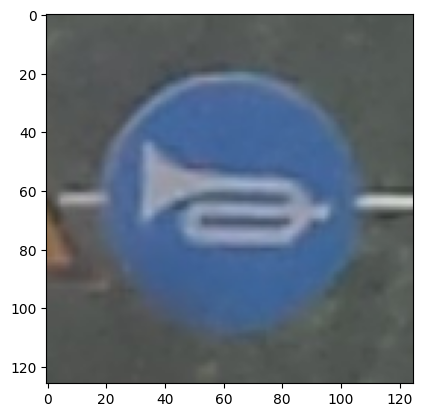

In [ ]:
img = mpimg.imread(unknown_image_path)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
predicted_class = int(predicted_class_label)
print(f"Predicted class: {label[predicted_class]}")


Predicted class: Horn


In [ ]:
model.save('traffic_model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
